# MACHINE LEARNING : linear regression 

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [103]:
df = pd.read_csv("data_sets/1000_Companies.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [105]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [107]:
# understanding my dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [109]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,1000.0,81668.927200,46537.567891,0.00,43084.500000,79936.00000,124565.500000,165349.20
Administration,1000.0,122963.897612,12613.927535,51283.14,116640.684850,122421.61215,129139.118000,321652.14
Marketing Spend,1000.0,226205.058419,91578.393542,0.00,150969.584600,224517.88735,308189.808525,471784.10
Profit,1000.0,119546.164656,42888.633848,14681.40,85943.198543,117641.46630,155577.107425,476485.43


In [111]:
# our target/dependent variable will be profit
X = df.iloc[:, :4].values


In [113]:
# our dependent variables will be rest four
Y = df.iloc[:,4].values


In [115]:
# checking if any missing value is there
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

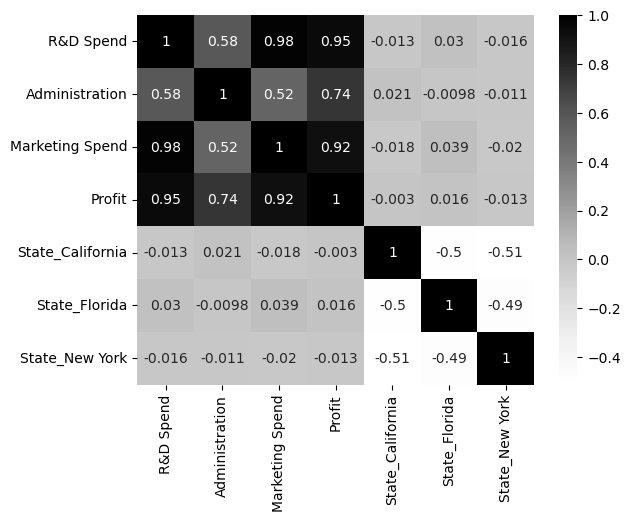

In [117]:
sns.heatmap(df2.corr(),cmap = "Greys",annot=True)
plt.show()

In [119]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(sparse_output=False), [3])
    ],
    remainder='passthrough'
)

X = ct.fit_transform(X)


In [121]:
X = X[:,1:]
X

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       ...,
       [0.0, 0.0, 100275.47, 241926.31, 227142.82],
       [0.0, 0.0, 128456.23, 321652.14, 281692.32],
       [0.0, 1.0, 161181.72, 270939.86, 295442.17]], dtype=object)

In [123]:
df2 = pd.get_dummies(df)

In [125]:
df2

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.800,471784.1000,192261.83000,False,False,True
1,162597.70,151377.590,443898.5300,191792.06000,True,False,False
2,153441.51,101145.550,407934.5400,191050.39000,False,True,False
3,144372.41,118671.850,383199.6200,182901.99000,False,False,True
4,142107.34,91391.770,366168.4200,166187.94000,False,True,False
...,...,...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,95279.96251,True,False,False
996,134970.00,130390.080,329204.0228,164336.60550,True,False,False
997,100275.47,241926.310,227142.8200,413956.48000,True,False,False
998,128456.23,321652.140,281692.3200,333962.19000,True,False,False


In [133]:
from sklearn.model_selection import train_test_split # training model
X_train ,X_test, Y_train , Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [137]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [141]:
Y_pred = regressor.predict(X_test)
Y_pred

array([ 89394.23575033,  88027.95819516,  94508.53314456, 175549.39580414,
        83150.97998075, 110365.61149629, 131468.83716138,  91080.37178897,
       164499.09125686,  52845.80977356,  66508.01269669, 150384.61048744,
       126593.26898994,  58880.41811174, 177293.42838505,  75039.29849958,
       118001.51199867, 164327.97934564, 174978.34867381, 182006.187832  ,
       124009.89479311,  85265.30904176, 180871.77326234,  83737.38254065,
       104639.96676191, 100860.1328575 ,  55972.52100478,  56567.46734372,
        68458.11806779, 211528.90031713, 120537.16479697, 111372.47323668,
       101263.40023154, 137751.9174904 ,  63521.80637148, 108499.76514776,
       185959.70818608, 171302.67161103, 174510.71530108, 117423.7029346 ,
        96497.33588966, 165207.59035385, 107363.9233561 ,  49811.45273477,
       116263.78584195,  58173.63390513, 158250.37929296,  78215.23575464,
       159564.20687058, 130917.09063892, 184767.68475628, 174475.4621405 ,
        93357.21436253,  

In [143]:
print(regressor.coef_)

[-7.89616003e+02 -5.51149301e+02  5.26047095e-01  9.78530820e-01
  9.80946128e-02]


In [145]:
print(regressor.intercept_)

-65676.83905541993


In [147]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.9311120236268361